# TP à rendre 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lire et afficher l'image à utiliser

In [2]:
image = np.genfromtxt('image.csv', delimiter=';')
image = image.astype(int)

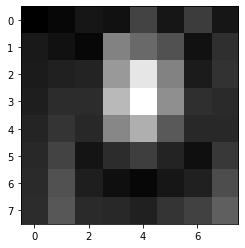

In [3]:
plt.imshow(image,cmap='gray')

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [4]:
print("La moyenne de luminance de l'image est ",np.mean(image))
lmin = np.min(image)
lmax = np.max(image)
print("La dynamique de l'image est [",lmin,",",lmax,"]")
print("Le contraste de l'image est ",(lmax-lmin)/(lmax+lmin))
print("L'écart-type des niveaux de gris de l'image est ",np.std(image))

La moyenne de luminance de l'image est  76.078125
La dynamique de l'image est [ 52 , 154 ]
Le contraste de l'image est  0.49514563106796117
L'écart-type des niveaux de gris de l'image est  20.916728269124093


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


In [5]:
valeurs = np.arange(0,256)
hs = np.zeros(256)
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        hs[image[i,j]] = hs[image[i,j]]+1
hs = hs.astype(int)
hsn = hs/(image.shape[0]*image.shape[1])

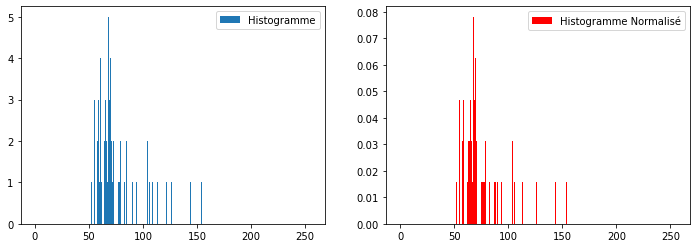

In [6]:
#En utilisant plt.bar
fig,(axhs,axhsn) = plt.subplots(1,2,figsize=(12,4))
axhs.bar(valeurs,hs,label="Histogramme")
axhs.legend()
axhsn.bar(valeurs,hsn,label="Histogramme Normalisé",color="red")
axhsn.legend()

In [7]:
#i = lmax.astype(int)
i=255
somme = np.sum(hs)
hsc = np.copy(hs)
while(i>=lmin):
    somme = somme - hsc[i]
    hsc[i]=hsc[i] + somme
    i=i-1
hscn = hsc/(image.shape[0]*image.shape[1])

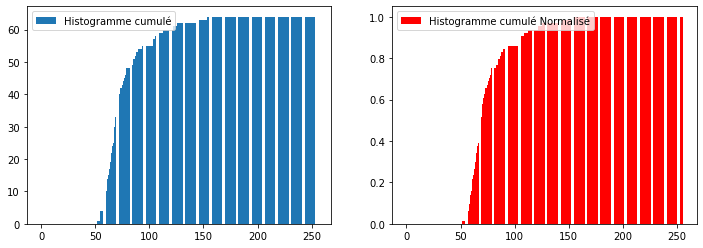

In [8]:
fig,(axhsc,axhscn) = plt.subplots(1,2,figsize=(12,4))
axhsc.bar(valeurs,hsc,label="Histogramme cumulé")
axhsc.legend()
axhscn.bar(valeurs,hscn,label="Histogramme cumulé Normalisé",color="red")
axhscn.legend()

# Comparer votre implémentation aux fonctions de opencv

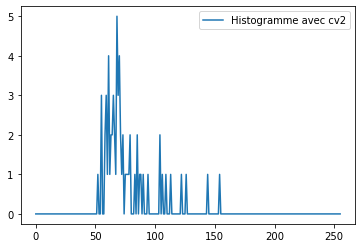

In [9]:
histogrammecv2=cv2.calcHist([np.uint8(image)],[0],None,[256],[0,256])
plt.plot(histogrammecv2,label="Histogramme avec cv2")
plt.legend()

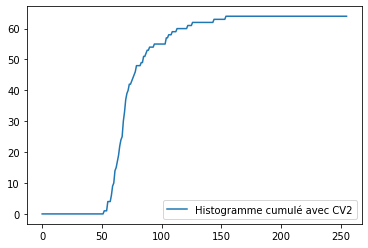

In [10]:
def histogrammeCumuléCV2(hist,minl):
    i=255 #i = lmax
    somme = np.sum(hist)
    histCumul = np.copy(hist)
    while(i>=minl):
        somme = somme - histCumul[i]
        histCumul[i]=histCumul[i] + somme
        i=i-1
    return histCumul
histCumul = histogrammeCumuléCV2(histogrammecv2,lmin)
plt.plot(histCumul,label="Histogramme cumulé avec CV2")
plt.legend()

- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

# Autres méthodes

Am I the only one who doesn't see a difference? I read that cv2 was faster than anything else but other than the way the 
result is drawn I don't see anything. Also the fact that the picture has to be casted into the type uint8 and the function calcHist doesn't work with regular integers, hence the np.uint8()

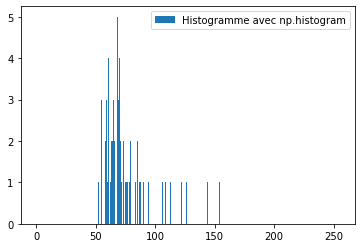

In [11]:
"""En utilisant np.histogram, la dernière valeur n'est jamais prise en compte par la fonction ce qui nous renvoi des array 
his et bins de taille differente (difference de 1), dans notre cas c'est his[255] qui n'existe pas, si ce n'était pas égal a
0 sa valeur aurait été sommée avec la case précedente his[254]"""
his,bins=np.histogram(image,valeurs)
his = np.append(his,0)
plt.bar(bins,his, label="Histogramme avec np.histogram")
plt.legend()

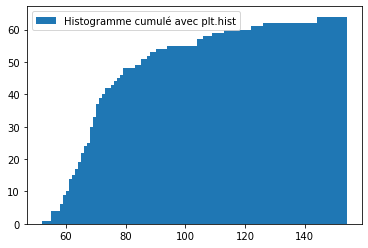

In [12]:
"""Honnetement j'ai du mal avec plt.hist, elle fait appel automatiquement a np.histogram mais les resultats sont imprévisibles,
ça marche uniquement avec image.ravel() et np.unique(image)
mais le point positif de plt.hist est qu'il suffit de mettre cumulaitve à true pour avoir l'histogramme cumulé"""
plt.hist(image.ravel(),np.unique(image),cumulative=True,label="Histogramme cumulé avec plt.hist")
plt.legend()

# 7.	Etendre l’histogramme et visualiser l’image résultante.

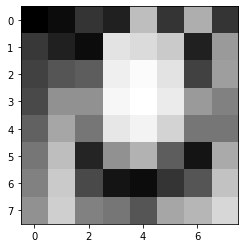

In [13]:
def etendreImage(img):
    cumlN = histogrammeCumuléCV2(cv2.calcHist([np.uint8(img)],[0],None,[256],[0,256]),np.min(image))/(img.shape[0]*img.shape[1])
    return np.around(cumlN[img]*255).astype(int)[:,:,0]#255 is L-1
ImageEtendue = etendreImage(image)
plt.imshow(ImageEtendue,cmap='gray')

# 8.	Comparer les histogrammes des deux images ; originale et étendue

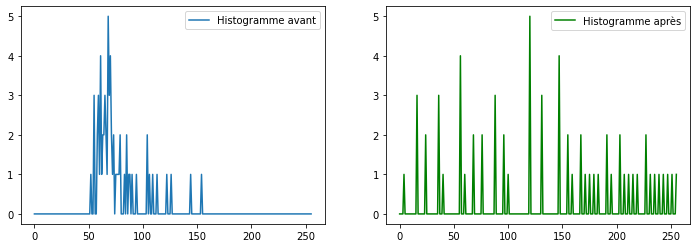

In [14]:
histocv2=cv2.calcHist([np.uint8(ImageEtendue)],[0],None,[256],[0,256])

fig,(sp1,sp2) = plt.subplots(1,2,figsize=(12,4))#12 inches by 4
sp1.plot(histogrammecv2,label="Histogramme avant")
sp1.legend()
sp2.plot(histocv2,label="Histogramme après",color="green")
sp2.legend()

# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

In [15]:
def expensionDynamique(img):
    lmax = np.max(img)
    lmin = np.min(img)
    return np.around(255/(lmax-lmin)*(img-lmin)).astype(int)

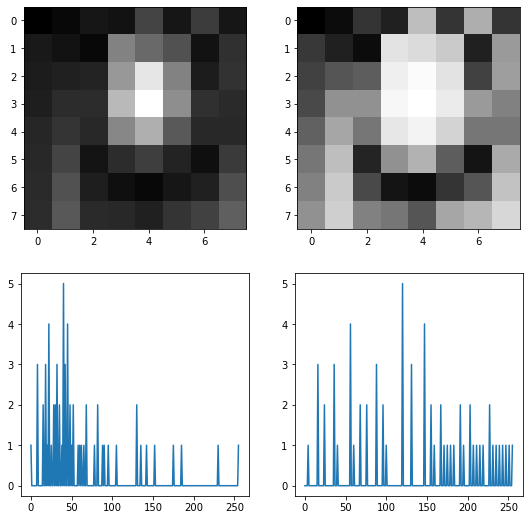

In [16]:
expDyn = expensionDynamique(image)
égaliz = etendreImage(image)
fig,((im1,im2),(hst1,hst2)) = plt.subplots(2,2,figsize=(9,9))
im1.imshow(expDyn,cmap='gray')
im2.imshow(égaliz,cmap='gray')
hst1.plot(cv2.calcHist([np.uint8(expDyn)],[0],None,[256],[0,256]))
hst2.plot(cv2.calcHist([np.uint8(égaliz)],[0],None,[256],[0,256]))

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

In [17]:
Einstein = cv2.imread('Fig0228(a).tif')
Melon = cv2.imread('Fig0208(a).tif')
Rock = cv2.imread('Fig0210(a).tif')
EinEtendu = etendreImage(Einstein)
MelEtendu = etendreImage(Melon)
RocEtendu = etendreImage(Rock)
EinDynami = expensionDynamique(Einstein)
MelDynami = expensionDynamique(Melon)
RocDynami = expensionDynamique(Rock)
Einstein.shape

(600, 490, 3)

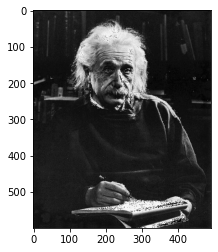

In [18]:
ImageG = (Einstein[:,:,0]+Einstein[:,:,1]+Einstein[:,:,2])/3
plt.imshow(ImageG,cmap="gray")

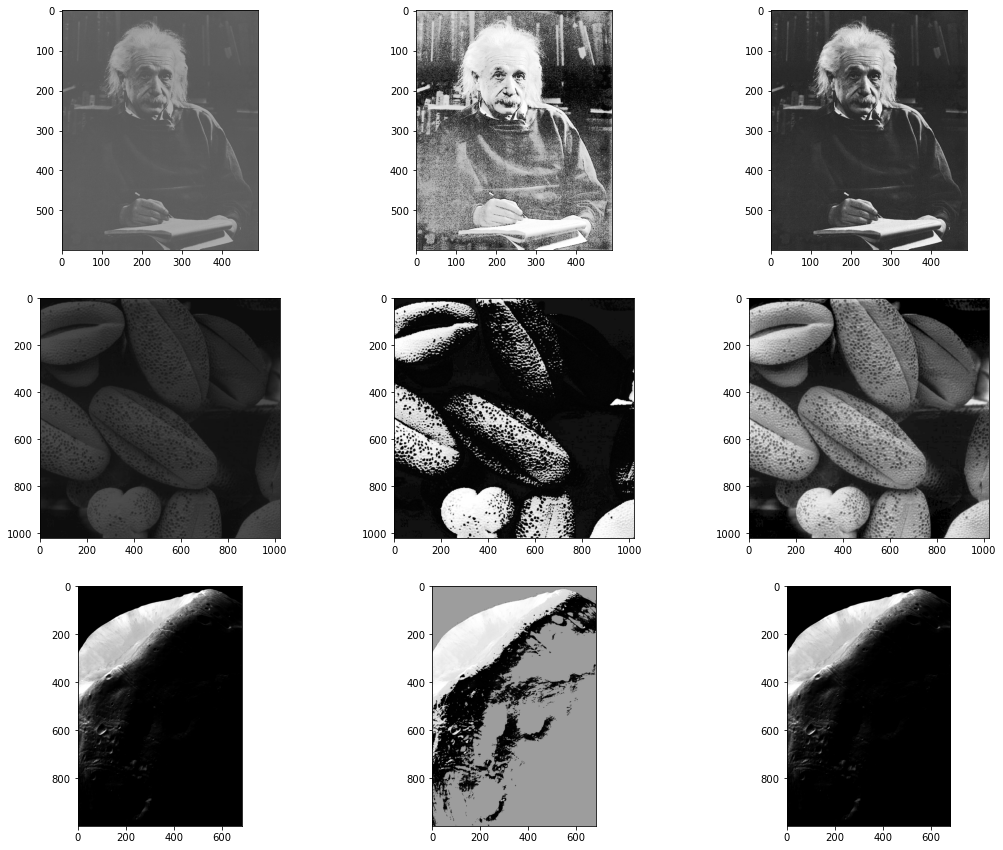

In [19]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
ax12 = fig.add_subplot(gs[1,2])
ax20 = fig.add_subplot(gs[2,0])
ax21 = fig.add_subplot(gs[2,1])
ax22 = fig.add_subplot(gs[2,2])
ax00.imshow(Einstein,cmap="gray")#because of norm the values ar automatically scaled because of imshow ;^^;
ax01.imshow(EinEtendu,cmap="gray")
ax02.imshow(EinDynami,cmap="gray")
ax10.imshow(Melon,cmap="gray")
ax11.imshow(MelEtendu,cmap="gray")
ax12.imshow(MelDynami,cmap="gray")
ax20.imshow(Rock,cmap="gray")
ax21.imshow(RocEtendu,cmap="gray")
ax22.imshow(RocDynami,cmap="gray")

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h
